<a href="https://colab.research.google.com/github/Anshad-Aziz/Heart_Failure/blob/main/Heart_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv('/content/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
print(df.ChestPainType.unique(),
      df.Sex.unique(),
      df.RestingECG.unique(),
      df.ST_Slope.unique())

['ATA' 'NAP' 'ASY' 'TA'] ['M' 'F'] ['Normal' 'ST' 'LVH'] ['Up' 'Flat' 'Down']


In [7]:
total_columns=df.columns

In [8]:
total_columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder
to_encoder=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
encoder_columns=LabelEncoder()
for columns in to_encoder:
  if columns in total_columns:
    df[columns]=encoder_columns.fit_transform(df[columns])

In [10]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [11]:
df.shape

(918, 12)

In [12]:
df.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [14]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


<Axes: >

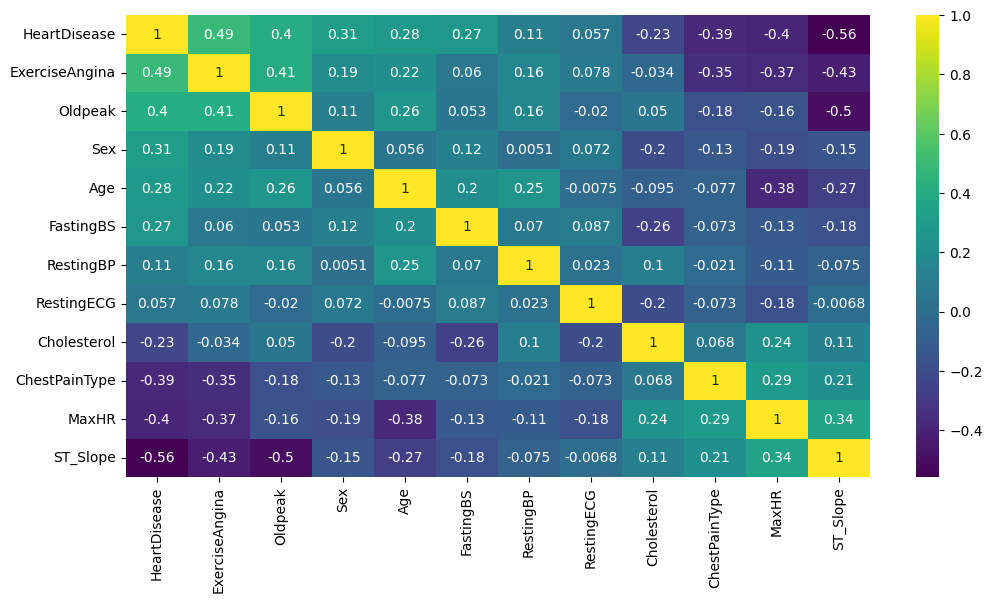

In [15]:
total_count=12
cols=df.corr().nlargest(total_count,'HeartDisease')['HeartDisease'].index
corr_matrix=df[cols].corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix,annot=True,cmap='viridis')

In [16]:
fig = px.line(df, y='RestingBP')
fig.show()

In [17]:
fig = px.scatter(df, x = 'Age', y='RestingBP')
fig.show()

In [18]:
df['RestingBP'].replace(0,np.nan,inplace=True)
average_RestingBP=df['RestingBP'].mean()
df['RestingBP'].fillna(average_RestingBP,inplace=True)

In [19]:
fig=px.line(df,y='RestingBP')
fig.show()

In [20]:
column_to_plot = ['RestingBP','Cholesterol','MaxHR']
for columns in column_to_plot:
    fig = px.line(df, y=column_to_plot)
    fig.update_layout(title=f'Line Chart for {columns}')
    fig.show()
    break

In [21]:
print(df[df['Age']<=20]['Age'].unique())

[]


In [22]:
print(df[df['Age']>=20]['Age'].unique())

[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]


In [23]:
def replace_zero_cholesterol(df):
    # Step 1: Create age groups and calculate average cholesterol for each group
    age_bins = [10, 20, 30, 40, 50, 60, 70, 80]
    age_labels = [f'{start}-{end}' for start, end in zip(age_bins[:-1], age_bins[1:])]
    df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
    average_cholesterol_by_age = df.groupby('AgeGroup')['Cholesterol'].mean()

    # Step 2: Replace zero values in 'Cholesterol' with average values based on age groups
    def replace_zero(row):
        if row['Cholesterol'] == 0:
            return average_cholesterol_by_age[row['AgeGroup']]
        else:
            return row['Cholesterol']

    df['Cholesterol'] = df.apply(replace_zero, axis=1)

    # Drop the temporary 'AgeGroup' column
    df.drop(columns=['AgeGroup'], inplace=True)

# Example usage:
replace_zero_cholesterol(df)

In [24]:
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160.0,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130.0,283.0,0,2,98,0,0.0,2,0


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
X=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [32]:
model=Sequential()
model.add(Dense(64,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                768       
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [35]:
model.fit(X_train_scaled,y_train,epochs=100,batch_size=64,validation_data=(X_test_scaled,y_test))

Epoch 1/100
12/12 [==============================] - 2s 27ms/step - loss: 0.7300 - accuracy: 0.4673 - val_loss: 0.6763 - val_accuracy: 0.5272
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6361 - accuracy: 0.6907 - val_loss: 0.6100 - val_accuracy: 0.7989
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5670 - accuracy: 0.7807 - val_loss: 0.5471 - val_accuracy: 0.8098
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4911 - accuracy: 0.8079 - val_loss: 0.4877 - val_accuracy: 0.8207
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4358 - accuracy: 0.8174 - val_loss: 0.4518 - val_accuracy: 0.8261
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3954 - accuracy: 0.8460 - val_loss: 0.4356 - val_accuracy: 0.8424
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3809 - accuracy: 0.8501 - val_loss: 0.4240 - val_accuracy: 0.8424
Epoch 8/100


In [36]:
y_pred=(model.predict(X_test_scaled)>0.5).astype(int).flatten()

6/6 [==============================] - 0s 3ms/step


In [37]:
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy}')

Accuracy:0.8695652173913043


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

In [39]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(max_iter=1000)
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy}')

Accuracy:0.855072463768116
